In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.neighbors import KNeighborsClassifier 
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics 

In [5]:
iris = pd.read_csv("C:/Users/latma/OneDrive/Documents/ComputerScience_Yr2/Machine_Learning/data sets/Iris.csv")
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


C:\Users\latma\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


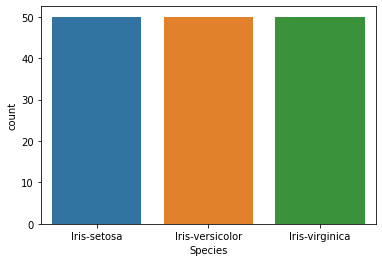

In [6]:
sns.countplot(iris['Species'],label="Count")
plt.show()

In [11]:
iris_vector=iris[["SepalLengthCm","SepalWidthCm","PetalLengthCm","PetalWidthCm","Species"]]
iris_vector.head()

<class 'pandas.core.frame.DataFrame'>


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [19]:
X = iris_vector.iloc[:,:-1].values #all rows, all columns up to the end. .values returns a numpy
y = iris_vector.iloc[:, 4].values # all the rows, only column 4 (could also write [:, -1])
print(X[0:4])
print(y[0:4])

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]]
['Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa']


In [22]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=4321)
scaler = StandardScaler()  
print(type(scaler))
scaler.fit(X_train)

X_train = scaler.transform(X_train)  
X_test = scaler.transform(X_test)

print(X_train[0:4])

<class 'sklearn.preprocessing._data.StandardScaler'>
[[ 1.19038523  0.32132272  1.24930239  1.43425014]
 [ 2.51878614  1.66249583  1.53649835  1.04309101]
 [ 0.22427548 -0.12573498  0.6174713   0.78231826]
 [ 0.58656664 -1.69043693  0.38771454  0.13038638]]


In [9]:
classifier = KNeighborsClassifier(n_neighbors=5)  
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print("kNN %):", metrics.accuracy_score(y_test, y_pred)*100)

[[13  0  0]
 [ 0 10  1]
 [ 0  1 13]]
kNN %): 94.7368421053
